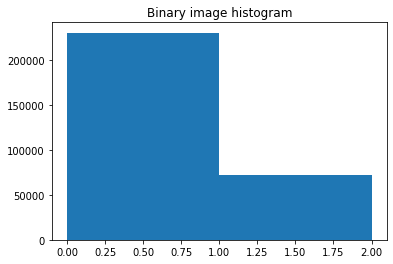

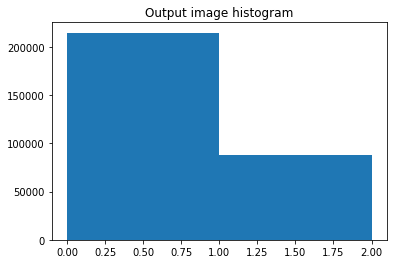

In [6]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dpc

# stucturing element
se = np.array([[1,1,1],
               [1,1,1],
               [1,1,1]])

se_r = se.shape[0]
se_c = se.shape[1]
pad = math.floor(se_r/2)

inputimg = cv2.imread('images/moon.jpg')
grayimg = cv2.cvtColor(dpc(inputimg), cv2.COLOR_BGR2GRAY)
(treash, binaryimg) = cv2.threshold(grayimg, 100, 255, cv2.THRESH_BINARY)

binaryimg = binaryimg / 255
img_r = binaryimg.shape[0]
img_c = binaryimg.shape[1]
outputimg = np.zeros_like(binaryimg)

# dilation
for i in range(img_r - math.ceil(se_r/2)):
    for j in range(img_c - math.ceil(se_c/2)):
        some_match = False
        for x in range(se_r):
            for y in range(se_c):
                if binaryimg[i+x][j+y] == se[x][y] and se[x][y] == 1:
                    some_match = True
                    break
        if some_match:
            outputimg[i+pad][j+pad] = 1

plt.title('Binary image histogram')
plt.hist(binaryimg.ravel(), 2, [0, 2])
plt.show()

plt.title('Output image histogram')
plt.hist(outputimg.ravel(), 2, [0, 2])
plt.show()  
            
cv2.imshow('Binary Image', binaryimg)
cv2.imshow('Output image [Dilation]', outputimg)
cv2.waitKey(0)
cv2.destroyAllWindows()